# Workflow Example with CCLM input convertor
Here we illustrate a complete workflow example using the CCLM convertor

## Imports

In [1]:
from pathlib import Path

import xarray as xr
import pandas as pd


from yaml import safe_load
from typing import Union, List

In [2]:
import valenspy as vp #The Valenspy package

## 1. Convert the data

### Get the filenames of CCLM data corresponding to CORDEX variable name


In [3]:
variable = 'tas'

### 1.1(a) Get the file names of the model data - with the input manager

In [13]:
manager = vp.InputManager(machine='hortense')
#Slightly anoying that the temp folder is in the T_2M folder which ensures that /T_2M/T_2M_ is needed as extra path identifier
ds = manager.load_data("CCLM",["tas"],period=1995,region="EUR11", path_identifiers=["EUR11_CO_TA_GC/","/T_2M/T_2M_daymean"])
ds

File paths found:
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950624.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950828.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950620.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950819.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950628.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950504.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950525.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950506.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_19950713.nc
/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M

<xarray.Dataset> Size: 2GB
Dimensions:       (time: 2946, bnds: 2, rlat: 434, rlon: 446)
Coordinates:
  * time          (time) datetime64[ns] 24kB 1995-05-01 ... 1995-08-31T17:00:00
    lon           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
    lat           (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
  * rlon          (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat          (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
    height_2m     float32 4B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 47kB dask.array<chunksize=(24, 2), meta=np.ndarray>
    rotated_pole  (time) |S1 3kB b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    tas           (time, rlat, rlon) float32 2GB dask.array<chunksize=(24, 434, 446), meta=np.ndarray>
Attributes: (12/15)
    CDI:             Climate Data Interface version 2.4.0 (https://mpimet.mpg...
    Conventions:     CF-1.4
    source:          cosmo6.00_clm2, int2lm3.0_clm1
    institution:     KU Leuven, Leuven, BELGIUM
    title:           EUR11 ERA5-driven simulation (dx = 12.5km) using COSMO-CLM6
    project_id:      CORDEXbe2
    ...              ...
    contact:         FIEN SERRAS (fien.serras@kuleuven.be)
    references:      http://ees.kuleuven.be/rcs/
    creation_date:   2024-06-05 08:47:43
    history:         Wed Jul 10 16:18:33 2024: cdo mergetime temp/T_2M_lffd19...
    CDO:             Climate Data Operators version 2.4.0 (https://mpimet.mpg...
    dataset:         CCLM

### 1.1 Get the file names of the model data 
(eventuall, this will be done by the input manager)

In [14]:
src_path = Path("../src/valenspy")

# define postprocessing base directory of CCLM
postproc_base_dir = "/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/"

# get experiment name
experiment = "EUR11_CO_TA_GC"

# get the file directory based on the model name. 

# reference dataset to compare to
model_name = 'CCLM'

# get lookup file for model
with open(src_path / "ancilliary_data" / Path(model_name+"_lookup.yml")) as file:
    mod_LOOKUP = safe_load(file)

# get CCLM variable corresponding to the requested variable using its look-up table
mod_var = mod_LOOKUP[variable]['raw_name']

# define the path
directory = Path(postproc_base_dir + experiment +'/'+mod_var + '/')

# define the CCLM files for the corresponding variable
files = list(directory.glob(mod_var+"_daymean.nc")) # Select all the netCDF files in the directory

files

[PosixPath('/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/EUR11_CO_TA_GC/T_2M/T_2M_daymean.nc')]

### 1.2 Use the input convertor to load the data

In [15]:
#Import Converter - This input converter will not do anything to the data.
from valenspy.inputconverter_functions import CCLM_to_CF
ic = vp.InputConverter(CCLM_to_CF)

In [16]:
cclm_ds = ic.convert_input(files) # Convert the input to the correct format

Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


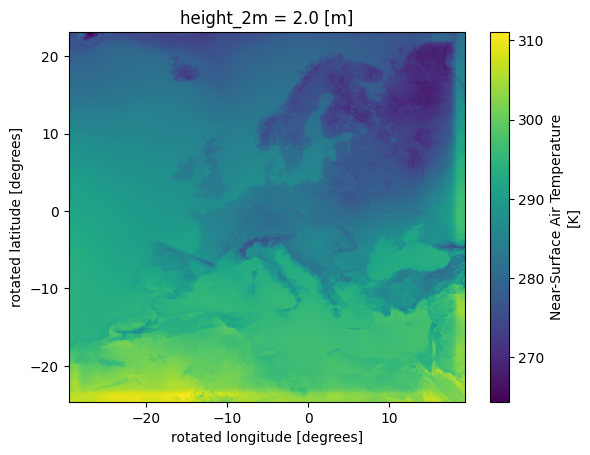

In [17]:
cclm_ds['tas'].mean('time').plot()

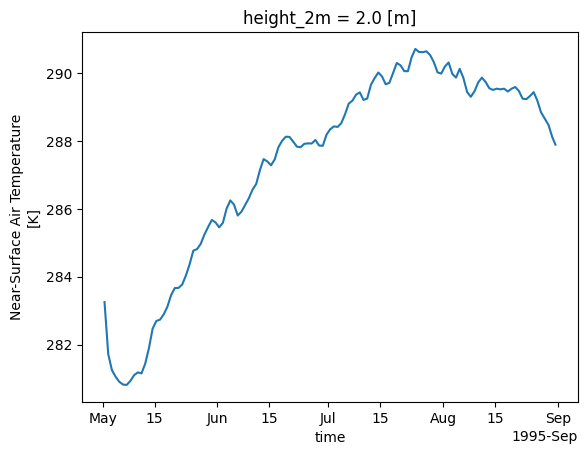

In [18]:
cclm_ds['tas'].mean(dim=('rlat','rlon')).plot()

### Check cclm for all available variables

In [27]:
variables = ["hfls", "hfss","tas", 'pr', "psl", "clt", "clh", "clm", "cll"]

hfls
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['hfls']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
hfss
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['hfss']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
tas
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
pr
Variable metadata is missing or incorrect
Variable attributes are missing or incorrect
The file is NOT ValEnsPy CF compliant.
0.00% of the variables are ValEnsPy CF compliant
NOT ValEnsPy CF compliant: ['pr']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
The following attributes are missing or incorrect for the variable pr:
Attribute  

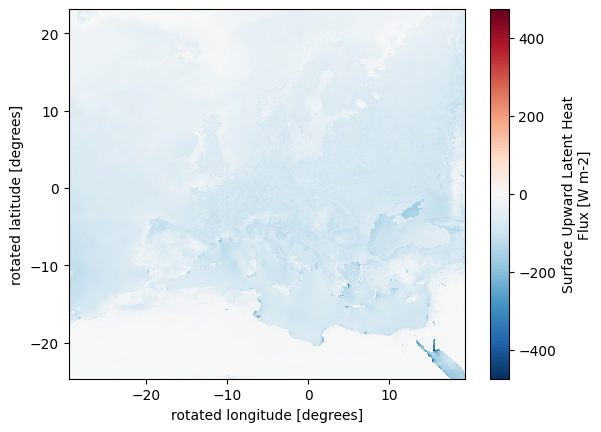

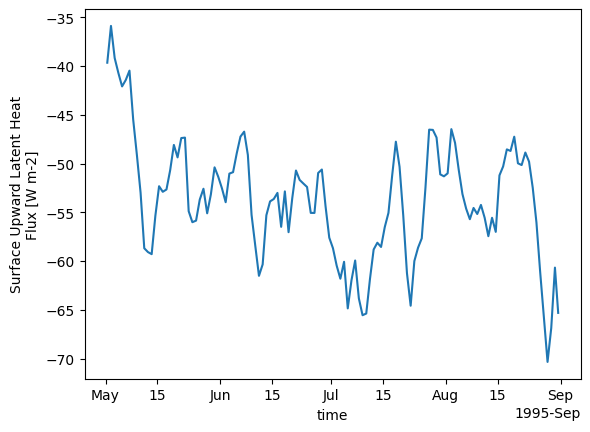

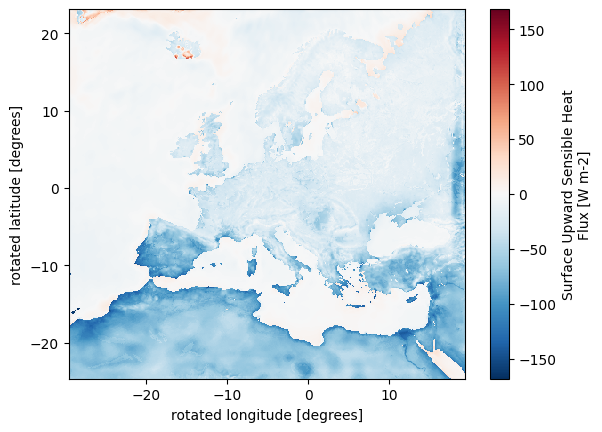

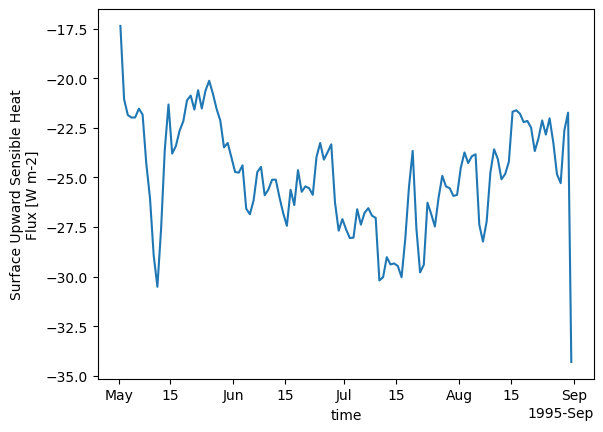

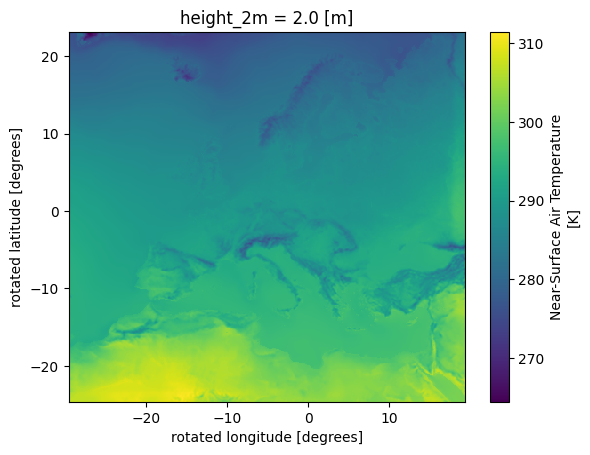

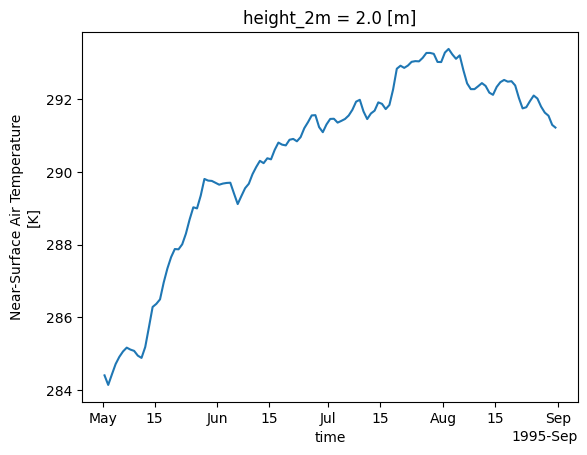

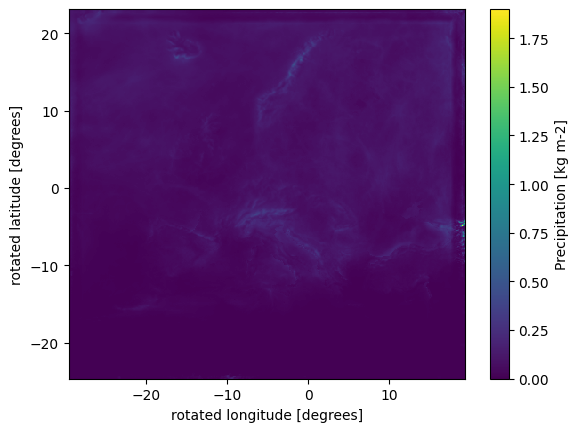

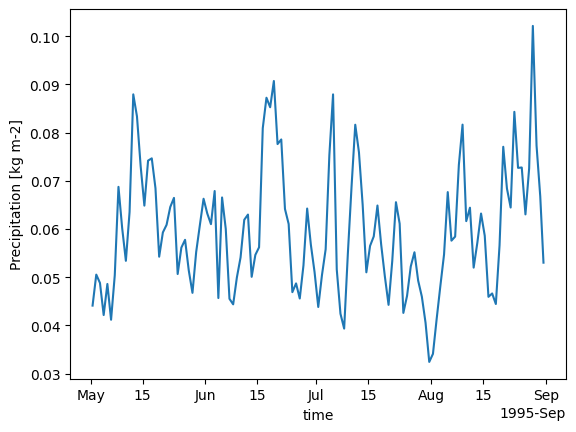

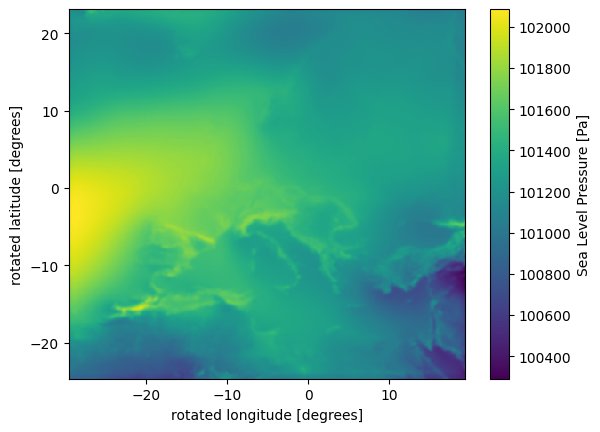

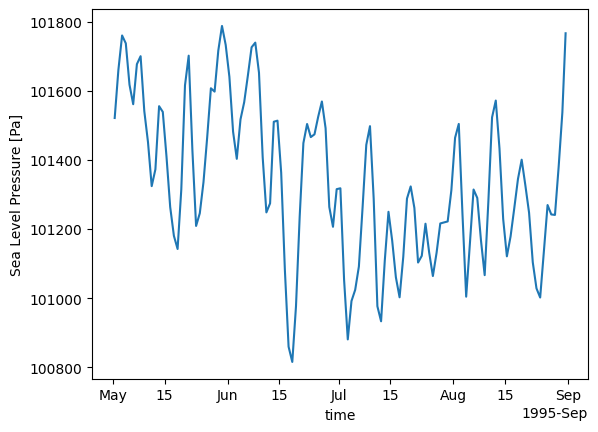

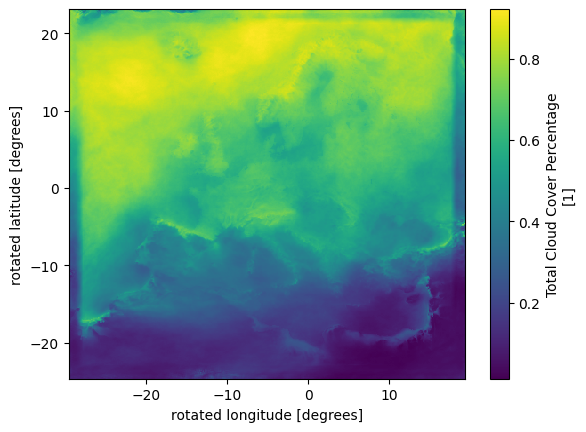

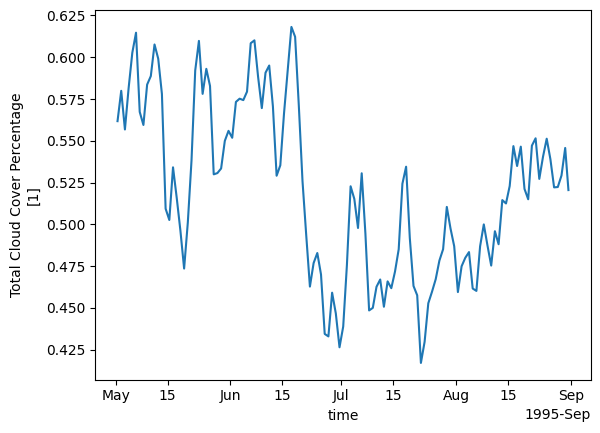

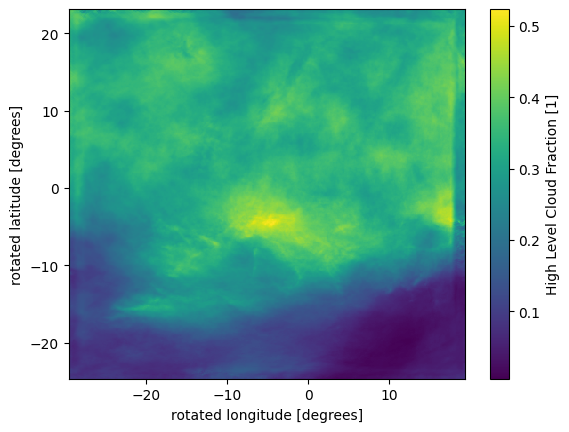

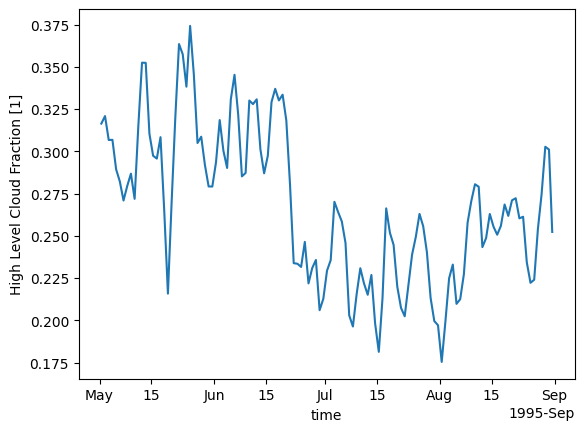

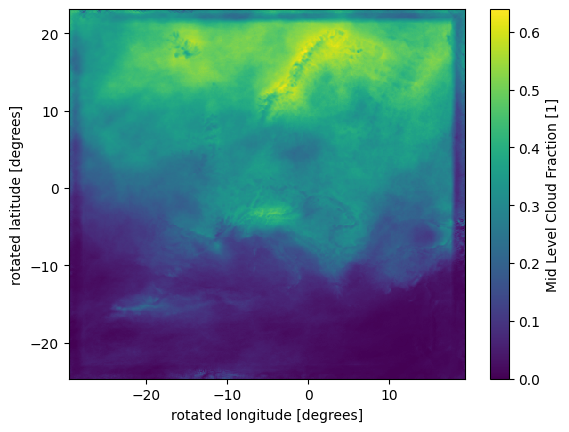

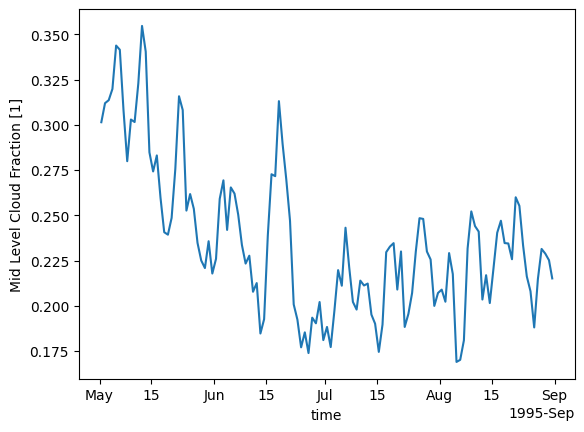

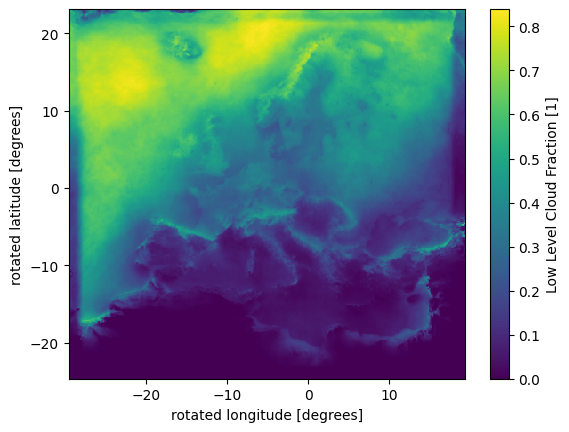

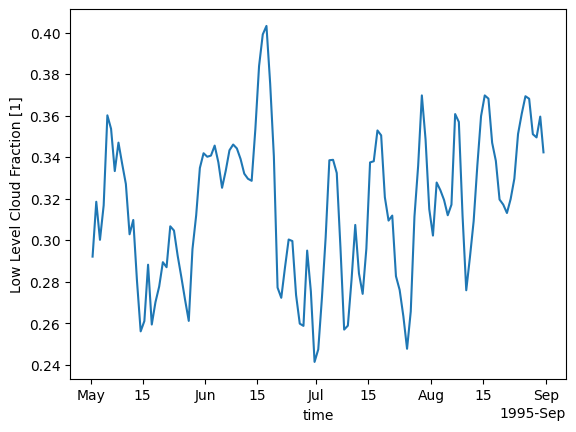

In [32]:
#Import Converter - This input converter will not do anything to the data.
import matplotlib.pyplot as plt
from valenspy.inputconverter_functions import CCLM_to_CF
ic = vp.InputConverter(CCLM_to_CF)

for variable in variables: 

    print(variable)

    src_path = Path("../src/valenspy")

    # define postprocessing base directory of CCLM
    postproc_base_dir = "/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/postprocessing/"

    # get experiment name
    experiment = "EUR11_CO_TA_GC_TSO"

    # get the file directory based on the model name. 

    # reference dataset to compare to
    model_name = 'CCLM'

    # get lookup file for model
    with open(src_path / "ancilliary_data" / Path(model_name+"_lookup.yml")) as file:
        mod_LOOKUP = safe_load(file)

    # get CCLM variable corresponding to the requested variable using its look-up table
    mod_var = mod_LOOKUP[variable]['raw_name']

    # define the path
    directory = Path(postproc_base_dir + experiment +'/'+mod_var + '/')

    # define the CCLM files for the corresponding variable
    files = list(directory.glob(mod_var+"_daymean.nc")) # Select all the netCDF files in the directory

    cclm_ds = ic.convert_input(files) # Convert the input to the correct format

    fig,ax = plt.subplots()
    cclm_ds[variable].mean('time').plot(ax=ax)
    fig,ax = plt.subplots()
    cclm_ds[variable].mean(dim=('rlat','rlon')).plot()